In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame

In [2]:
#load dataset
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data")

In [3]:
header_names=['Gender','Age','debt','married','bankcustomer','educationlevel','ethinicity','yearsemployed','priordfult','employed','creditscore','driverlicense','citizen', 'zipcode','income','approvalstatus']
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",names=header_names)

#inspect data
df.head()

,Gender,Age,debt,married,bankcustomer,educationlevel,ethinicity,yearsemployed,priordfult,employed,creditscore,driverlicense,citizen,zipcode,income,approvalstatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   debt            690 non-null    float64
 3   married         690 non-null    object 
 4   bankcustomer    690 non-null    object 
 5   educationlevel  690 non-null    object 
 6   ethinicity      690 non-null    object 
 7   yearsemployed   690 non-null    float64
 8   priordfult      690 non-null    object 
 9   employed        690 non-null    object 
 10  creditscore     690 non-null    int64  
 11  driverlicense   690 non-null    object 
 12  citizen         690 non-null    object 
 13  zipcode         690 non-null    object 
 14  income          690 non-null    int64  
 15  approvalstatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
#summary stat.
df.describe()

,debt,yearsemployed,creditscore,income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
# for each of the categorical columns, let's see the unique value
for i in df.columns:
    if df[i].dtype==object:
        print (df[i].unique())

['b' 'a' '?']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' 

In [7]:
# consistent missing values
df=df.replace('?',np.nan)

In [8]:
df.isnull().sum()*100/len(df)

Gender            1.739130
Age               1.739130
debt              0.000000
married           0.869565
bankcustomer      0.869565
educationlevel    1.304348
ethinicity        1.304348
yearsemployed     0.000000
priordfult        0.000000
employed          0.000000
creditscore       0.000000
driverlicense     0.000000
citizen           0.000000
zipcode           1.884058
income            0.000000
approvalstatus    0.000000
dtype: float64

In [9]:
def fix_missing_mean(df,col):
    df[col]=pd.to_numeric(df[col],errors='coerce')
    df[col].fillna(df[col].mean(),inplace=True)
    
def fix_missing_ffill(df,col):
    df[col]=df[col].fillna(method="ffill")

In [10]:
fix_missing_ffill(df,'Gender')
fix_missing_ffill(df,'bankcustomer')
fix_missing_ffill(df,'married')
fix_missing_ffill(df,'Age')
fix_missing_ffill(df,'ethinicity')
fix_missing_ffill(df,'educationlevel')
fix_missing_mean(df,'zipcode')
df.isnull().sum()

Gender            0
Age               0
debt              0
married           0
bankcustomer      0
educationlevel    0
ethinicity        0
yearsemployed     0
priordfult        0
employed          0
creditscore       0
driverlicense     0
citizen           0
zipcode           0
income            0
approvalstatus    0
dtype: int64

In [11]:
##analysis (supervised ML CLASSIFICATION )

In [12]:
y=df['approvalstatus']
features=df.drop(['approvalstatus'],axis=1)
features.head()

,Gender,Age,debt,married,bankcustomer,educationlevel,ethinicity,yearsemployed,priordfult,employed,creditscore,driverlicense,citizen,zipcode,income
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


In [13]:
object_cols=['Gender','Age','married','bankcustomer','educationlevel','ethinicity','priordfult','employed','driverlicense','citizen', 'zipcode']

X=features.copy()
ordinal_encoder=OrdinalEncoder()
X[object_cols]=ordinal_encoder.fit_transform(features[object_cols])
X.head()

,Gender,Age,debt,married,bankcustomer,educationlevel,ethinicity,yearsemployed,priordfult,employed,creditscore,driverlicense,citizen,zipcode,income
0,1.0,156.0,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,69.0,0
1,0.0,328.0,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560
2,0.0,89.0,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,97.0,824
3,1.0,125.0,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3
4,1.0,43.0,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0


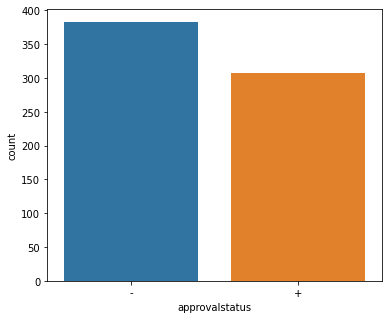

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6,5), sharex=True)
sns.countplot(data=df, x='approvalstatus',order=df["approvalstatus"].value_counts().index)

plt.show()


In [15]:
xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=.30,random_state=2)

In [16]:
#a)logitreg
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescaledxTrain=scaler.fit_transform(xTrain)
rescaledxTest=scaler.fit_transform(xTest)

In [17]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(rescaledxTrain, yTrain)

LogisticRegression()

In [18]:
from sklearn.metrics import confusion_matrix
y_pred= logreg.predict(rescaledxTest)
y_pred1=logreg.predict(rescaledxTrain)

print ('test:Accuracy=',logreg.score(rescaledxTest,yTest))
print ('train:Accuracy=',logreg.score(rescaledxTrain, yTrain))


confusion_matrix(yTest,y_pred)

test:Accuracy= 0.8792270531400966
train:Accuracy= 0.855072463768116


array([[91, 11],
       [14, 91]], dtype=int64)

1 Train score: 0.8426501035196687 Test score: 0.8840579710144928
2 Train score: 0.8426501035196687 Test score: 0.8840579710144928
3 Train score: 0.8509316770186336 Test score: 0.855072463768116
4 Train score: 0.8737060041407867 Test score: 0.8357487922705314
5 Train score: 0.8881987577639752 Test score: 0.8405797101449275
6 Train score: 0.9254658385093167 Test score: 0.8115942028985508
7 Train score: 0.94824016563147 Test score: 0.821256038647343
8 Train score: 0.9668737060041408 Test score: 0.8115942028985508
9 Train score: 0.9813664596273292 Test score: 0.8309178743961353


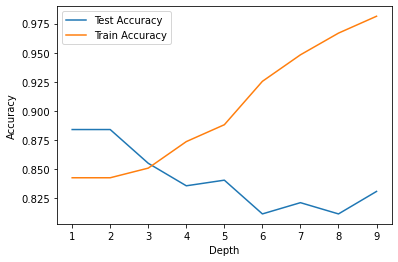

In [19]:
#b)DECISION tREE
train_acc=[]
test_acc=[]
list_score=[]
approvalstatus=[]
for i in range(1,10):
    dtc=DecisionTreeClassifier(max_depth= i,random_state=0)
    
    dtc.fit(xTrain, yTrain)
    
    train_pred=dtc.predict(xTrain)
    test_pred=dtc.predict(xTest)
    
    test_acc=accuracy_score(yTest,test_pred)
    train_acc=accuracy_score(yTrain, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)
    
    list_score.append([i,accuracy_score(train_pred, yTrain),accuracy_score(test_pred, yTest)]) 

 #plot
df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()    

train score= 0.9813664596273292 test score= 0.8695652173913043


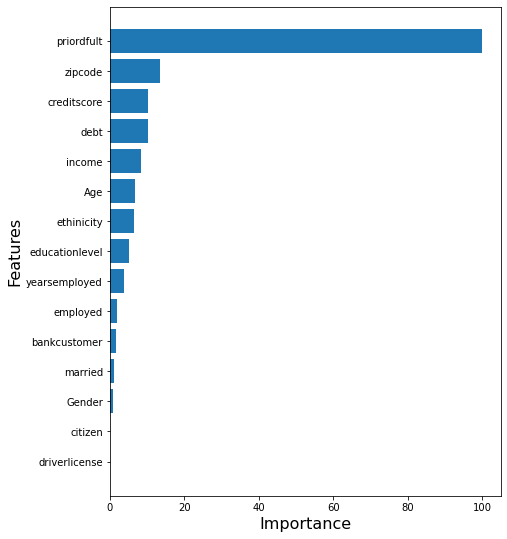

In [20]:
#c)gradient boost
clf=GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

train_predict=clf.predict(xTrain)
test_predict=clf.predict(xTest)

test_acc=accuracy_score(yTest,test_predict)
train_acc=accuracy_score(yTrain,train_predict)
print('train score=',train_acc,'test score=',test_acc)

#plot feature importance
feature_importance=clf.feature_importances_
feature_importance = 100.0 * (feature_importance /feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# plt.subplot(1, 2, 2)
plt.figure(figsize=(7, 9))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Features',fontsize=16)
plt.show()



In [21]:
#d)xgboost
import xgboost as xgb
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(xTrain, yTrain)

train_predict = model.predict(xTrain)
test_predict = model.predict(xTest)

test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

C:\Users\KS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:21:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 1.0 Test score: 0.8743961352657005


Train score: 0.8115942028985508 Test score: 0.6714975845410628
2 Train score: 0.8115942028985508 Test score: 0.6714975845410628
Train score: 0.7929606625258799 Test score: 0.6811594202898551
3 Train score: 0.7929606625258799 Test score: 0.6811594202898551
Train score: 0.7619047619047619 Test score: 0.6521739130434783
4 Train score: 0.7619047619047619 Test score: 0.6521739130434783
Train score: 0.7743271221532091 Test score: 0.6908212560386473
5 Train score: 0.7743271221532091 Test score: 0.6908212560386473
Train score: 0.7660455486542443 Test score: 0.6763285024154589
6 Train score: 0.7660455486542443 Test score: 0.6763285024154589
Train score: 0.7370600414078675 Test score: 0.6956521739130435
7 Train score: 0.7370600414078675 Test score: 0.6956521739130435
Train score: 0.7391304347826086 Test score: 0.7101449275362319
8 Train score: 0.7391304347826086 Test score: 0.7101449275362319
Train score: 0.7308488612836439 Test score: 0.7101449275362319
9 Train score: 0.7308488612836439 Test sc

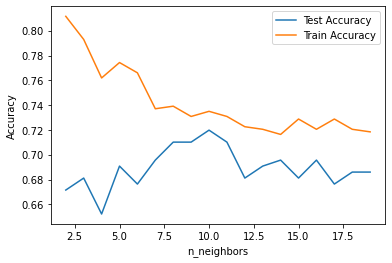

In [22]:
#e)knn
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(xTrain, yTrain)
    
    train_pre=knn.predict(xTrain)
    test_pre=knn.predict(xTest)
    
    test_acc = accuracy_score(yTest, test_pre)
    train_acc = accuracy_score(yTrain, train_pre)
    print('Train score:',train_acc,'Test score:',test_acc)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pre, yTrain),accuracy_score(test_pre, yTest)])
    

df3 = DataFrame (list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()    

In [23]:
from prettytable import PrettyTable 
accu_table= PrettyTable(['MODEL','Train_ACCURACY','Test_ACCURACY'])
accu_table.add_row(['logitic_Regression',0.86,0.88])
accu_table.add_row(['Decision_TREE',0.85,0.86])
accu_table.add_row(['Gradient_Boost',0.98,0.87])
accu_table.add_row(['XGBoost',1.0,0.87])
accu_table.add_row(['KNN',0.73,0.72])

print(accu_table)

+--------------------+----------------+---------------+
|       MODEL        | Train_ACCURACY | Test_ACCURACY |
+--------------------+----------------+---------------+
| logitic_Regression |      0.86      |      0.88     |
|   Decision_TREE    |      0.85      |      0.86     |
|   Gradient_Boost   |      0.98      |      0.87     |
|      XGBoost       |      1.0       |      0.87     |
|        KNN         |      0.73      |      0.72     |
+--------------------+----------------+---------------+


In [24]:
##Conclusion-
#I have used five different types of classfiers techniques to predict the approval rate based on the given set of features
#WHILE the best test data accuracy (88%) is obtaied from the Logistic Regression classifier. The small difference in train and test accuracy scores indicates the absence of overfitting and underfitting.
#Also,I found that priordefault has highest SIGNIFICANCE in predicting the approval rates. (see, c)Gradient Boost,graph) 
#To sum up,I conclude by saying the feature selected(given in the dataset) work well in predicting the approval rate of credit cards so, these predictions only work iff data is pre-processed and cleaned properly.

In [25]:
#Reference-this learning project is totally amalgation of works by Lopa Nayak & Aman Sanga and Ibrahim Saidi. 
        #BUT,author tries to understand and implement the basic rationale behind these codes. 